In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [164]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [166]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [167]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending"})
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


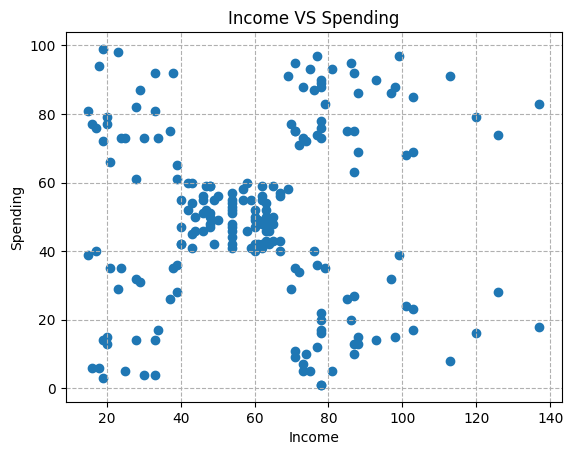

In [168]:
plt.scatter(df['Income'], df['Spending'])
plt.title('Income VS Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.grid(axis='both', linestyle='--')
plt.show()

*   Clusters/Groups: We can observe distinct clusters of customers based on their income and spending habits. For example, there's a group with low income and low spending, another with high income and low spending, and a group with high income and high spending. There also seems to be a group with moderate income and moderate spending, and potentially a group with low income and high spending.

*   Potential Customer Segments: These clusters likely represent different customer segments. Understanding these segments can be valuable for targeted marketing and business strategies.

*   Low Income, Low Spending: Perhaps new or budget-conscious customers.

*   High Income, Low Spending: Customers who earn a lot but don't spend much at the mall.

*   High Income, High Spending: The most valuable customers, spending a significant amount.

*   Moderate Income, Moderate Spending: The average customer base.

*   Low Income, High Spending: Possibly impulse buyers or those prioritizing certain purchases despite lower income.

*   No Strong Linear Relationship: There isn't a clear linear correlation between income and spending across all customers. This reinforces the idea that different factors (besides just income) influence spending behavior.












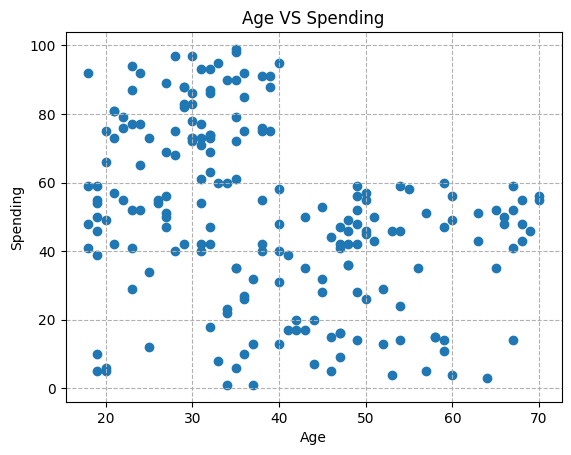

In [169]:
plt.scatter(df['Age'], df['Spending'])
plt.title('Age VS Spending')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.grid(axis='both', linestyle='--')
plt.show()

*   Spending Varies Across Age Groups: It appears that spending habits are not uniform across all age ranges. We see a spread of spending scores within different age groups.

*   Potential High Spending in Younger and Middle-Aged Adults: There seems to be a concentration of higher spending scores among younger adults and those in their middle age (roughly 20s to 40s).

*   Lower Spending in Older Age Groups: As age increases, particularly in the older age ranges (50s and beyond), the spending scores seem to be generally lower. There are fewer points in the higher spending range for these ages.

*   No Strong Linear Trend: Similar to the income vs. spending plot, there isn't a clear, strong linear relationship between age and spending score. While there's a general tendency for spending to be higher in younger to middle age and lower in older age, it's not a perfectly straight line, and there's a lot of variation within each age group.

*   Different Spending Behaviors within Age Groups: Even within a specific age range, there's a range of spending scores. This suggests that age is just one factor influencing spending, and other factors (like income, lifestyle, etc.) also play a significant role.







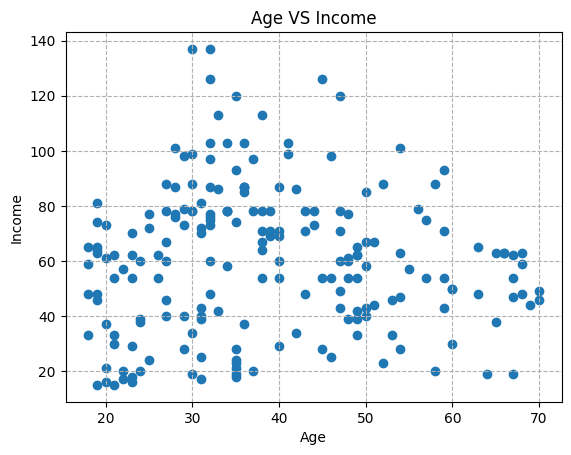

In [170]:
plt.scatter(df['Age'], df['Income'])
plt.title('Age VS Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(axis='both', linestyle='--')
plt.show()

*   Income Distribution Across Age: The plot shows how annual income is distributed across different age groups.

*   Peak Income in Middle Age: There appears to be a general trend where income tends to be lower in younger age groups, increases and peaks in the middle-aged years (roughly late 30s to 50s), and then may slightly decrease or plateau in older age groups.

*   Income Variation Within Age Groups: Even within a specific age range, there's a noticeable variation in income levels. This indicates that age is not the sole determinant of income, and other factors like career path, experience, and industry likely play a significant role.

*   No Strong Linear Correlation: There isn't a strong, clear linear relationship where income consistently increases or decreases with age in a straight line. The relationship is more curved or clustered.

*   Potential for Different Career Stages: The spread of points might reflect different career stages. Younger individuals might be at the beginning of their careers with lower initial incomes, while middle-aged individuals might be at their peak earning potential. Older individuals might be retired or in less demanding roles.







In [171]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender', 'Age', 'Income', 'Spending']]
df.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Encoding

# Data Scaling (Choose One)

In [172]:
# Perform one-hot encoding on the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,Age,Income,Spending,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


,Age,Income,Spending,Gender_Male
0,0.19,0.015,0.39,1.0
1,0.21,0.015,0.81,1.0
2,0.20,0.016,0.06,0.0
3,0.23,0.016,0.77,0.0
4,0.31,0.017,0.40,0.0


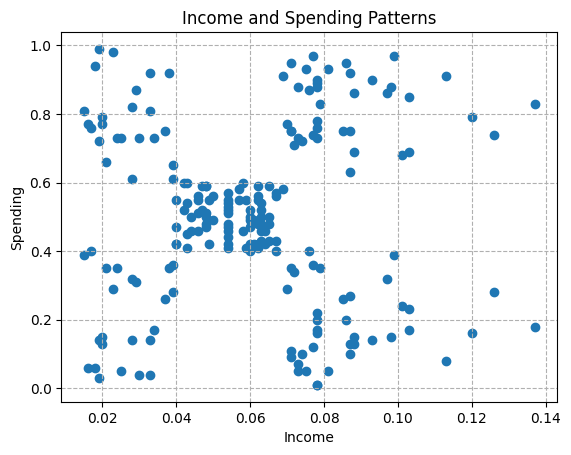

In [173]:
# scale dataset with decimal scaling
def decimal_scaling(df):
  normalized_df = df.copy()
  for column in df.columns:
    j = 0
    max_value = df[column].max()
    while max_value > 1:
      max_value /= 10
      j += 1
    normalized_df[column] = df[column] / (10 ** j)
  return normalized_df

# Example usage:
# Apply decimal scaling to the encoded DataFrame which contains only numerical columns
df_decimal_scaled = decimal_scaling(df_encoded)

display(df_decimal_scaled.head())

# visualization
plt.scatter(df_decimal_scaled["Income"], df_decimal_scaled["Spending"])
plt.xlabel("Income")
plt.ylabel("Spending")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Spending Patterns")
plt.show()

In [174]:
# scale dataset with Standard Scaler
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['Age', 'Income', 'Spending']
df_to_scale = df_encoded[columns_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_sc_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=columns_to_scale)

# Display the first few rows of the standard scaled DataFrame
display(df_sc_scaled.head())

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# K-Means Clustering

In [175]:
from sklearn.cluster import KMeans

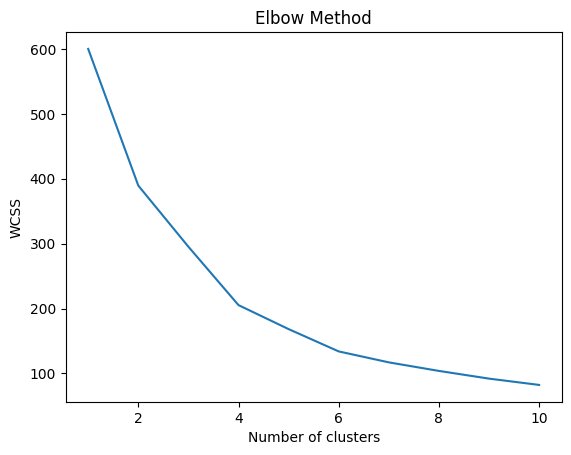

In [176]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [177]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


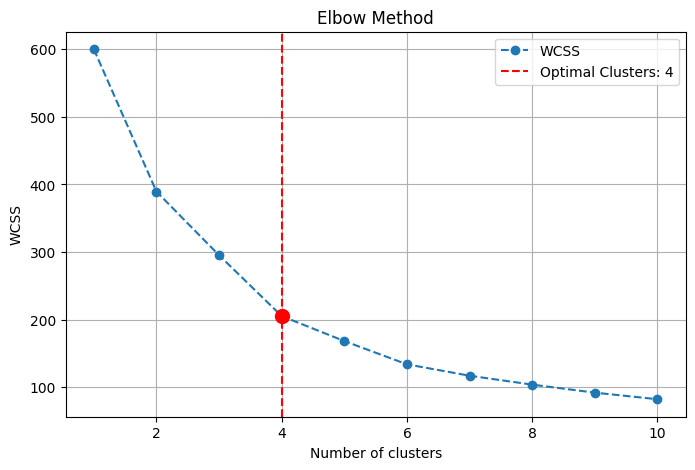

The optimal number of clusters is: 4


In [178]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [179]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Income,Spending,KMeans_Cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


/tmp/ipython-input-4174339583.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Income", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


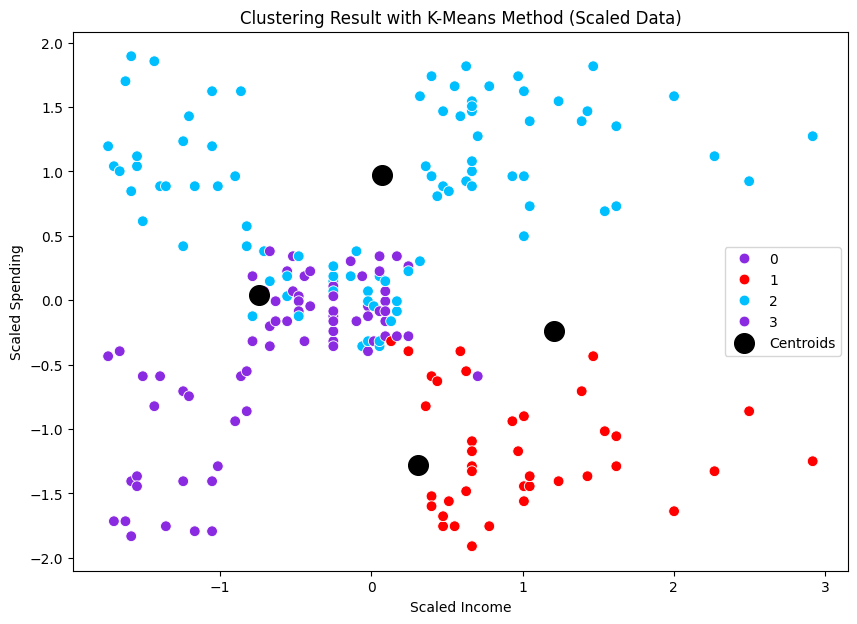

In [180]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

*   Distinct Clusters: The plot clearly shows that the KMeans algorithm has successfully separated the data into distinct clusters based on the scaled Income and Spending scores.

*   Cluster Separation: The clusters appear to be well-separated, indicating that customers within each cluster have relatively similar income and spending patterns, while customers in different clusters have noticeably different patterns.

*   Centroid Locations: The centroids are positioned at the approximate center of each cluster, representing the average scaled Income and Spending for that group of customers. Their locations help to characterize each cluster:

*   One cluster is in the lower-left, representing customers with low scaled income and low scaled spending.

*   One cluster is in the upper-left, representing customers with low scaled income and high scaled spending.

*   One cluster is in the lower-right, representing customers with high scaled income and low scaled spending.

*   One cluster is in the upper-right, representing customers with high scaled income and high scaled spending.

*   Validation of Elbow Method: The clear separation of these clusters visually supports the choice of 4 as the optimal number of clusters based on the Elbow Method.










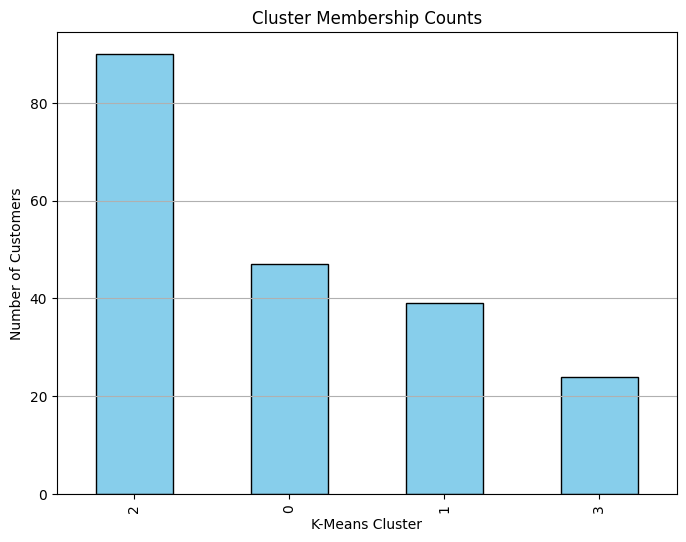

In [181]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


Uneven Cluster Sizes: The plot clearly shows that the clusters are not of equal size. Some clusters have significantly more members than others.

Largest Cluster: Cluster 2 is the largest cluster, containing the highest number of customers.

Smallest Cluster: Cluster 3 is the smallest cluster.

Segment Proportions: The plot provides a visual representation of the proportion of customers in each identified segment. This information is valuable for understanding the relative size and importance of each customer group. For example, since Cluster 2 is the largest, strategies targeting this group could potentially impact a larger portion of the customer base.

In [182]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster, and the mode of gender
cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Spending': ['mean', 'min', 'max'],
    'Gender': lambda x: x.mode().tolist() # Calculate the mode of Gender
})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income            Spending          \
                     mean min max       mean min  max       mean min max   
KMeans_cluster                                                             
0               55.638298  40  70  54.382979  38   79  48.851064  35  60   
1               39.871795  19  59  86.102564  64  137  19.358974   1  42   
2               28.500000  18  40  61.677778  15  137  71.766667  41  99   
3               43.125000  19  67  26.958333  15   40  22.083333   3  42   

                  Gender  
                <lambda>  
KMeans_cluster            
0               [Female]  
1                 [Male]  
2               [Female]  
3               [Female]

## Managerial Implications Based on the Four Clusters

4 Profiles

**Cluster 0**

*   **Profile:**
    *   **Age:** Older adults (mean age around 55.6, range 40-70).
    *   **Income:** Moderate income (mean around $54.4k, range $38k-$79k).
    *   **Spending:** Moderate spending score (mean around 48.9, range 35-60).
    *   **Gender Mode:** [Female]
*   **Implications:** This cluster represents older, middle-income, and moderate-spending customers, predominantly female. They might be looking for comfortable, reliable products and a pleasant shopping experience. Marketing could focus on quality, durability, and customer service, potentially emphasizing aspects that appeal to a female demographic. Promotions could be targeted towards their interests and lifestyle.

**Cluster 1**

*   **Profile:**
    *   **Age:** Middle-aged adults (mean age around 39.9, range 19-59).
    *   **Income:** High income (mean around $86.1k, range $64k-$137k).
    *   **Spending:** Low spending score (mean around 19.4, range 1-42).
    *   **Gender Mode:** [Male]
*   **Implications:** This cluster consists of high-income individuals who do not spend much at the mall, predominantly male. Similar to the previous analysis, they might prefer online shopping, other retailers, or have different spending priorities. Strategies should focus on understanding their preferences, potentially introducing luxury goods or exclusive services that might appeal to higher-earning men, and investigating why they are not spending more at this location.

**Cluster 2**

*   **Profile:**
    *   **Age:** Younger adults (mean age around 28.5, range 18-40).
    *   **Income:** Moderate to high income (mean around $61.7k, range $15k-$137k).
    *   **Spending:** High spending score (mean around 71.8, range 41-99).
    *   **Gender Mode:** [Female]
*   **Implications:** This cluster represents younger, higher-spending customers, predominantly female. They are likely trend-conscious and receptive to new products and experiences. Marketing should leverage social media, influencer partnerships, and highlight new arrivals or popular items, potentially with a focus on platforms and styles popular with young women. Experiential marketing and loyalty programs could be effective for this group.

**Cluster 3**

*   **Profile:**
    *   **Age:** Middle-aged adults (mean age around 43.1, range 19-67).
    *   **Income:** Low income (mean around $27k, range $15k-$40k).
    *   **Spending:** Low spending score (mean around 22.1, range 3-42).
    *   **Gender Mode:** [Female]
*   **Implications:** This cluster represents middle-aged, low-income, and low-spending customers, predominantly female. They are likely very price-sensitive and focused on essential purchases. Marketing could emphasize affordability, discounts, and value bundles, focusing on value propositions that resonate with this demographic. Loyalty programs focused on savings could also be appealing.